In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
from warnings import filterwarnings
filterwarnings('ignore')

In [352]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [354]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [469]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [355]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/healthcare_analytics/train.csv')

In [224]:
df_train.shape

(318438, 18)

In [356]:
df_train.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [357]:
87491+78139+55159+35018+23604+11743+10254+6683+4838+2765+2744

318438

In [358]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/healthcare_analytics/test.csv')

In [359]:
df_test.shape

(137057, 17)

In [360]:
#Exploratory Data Analysis

In [361]:
df_train['source']='train'
df_test['source']='test'

In [362]:
df_health=pd.concat([df_train,df_test],ignore_index=True)
df_health.shape

(455495, 19)

In [363]:
df_health.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [364]:
len(df_health.case_id.unique())

455495

In [365]:
df_health.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [366]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455495 entries, 0 to 455494
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

In [367]:
#Summary Description

In [368]:
df_health.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455347.000000,455495.000000,448806.000000,455495.000000,455495.000000
mean,227748.00000,18.326335,4.767798,3.196140,2.628420,65786.793563,7.249495,3.284229,4877.434022
std,131490.22477,8.634036,3.102450,1.166994,0.871997,37968.830850,4.758941,1.768044,1084.982089
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,113874.50000,11.000000,2.000000,2.000000,2.000000,32874.000000,4.000000,2.000000,4184.000000
50%,227748.00000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4738.000000
75%,341621.50000,26.000000,7.000000,4.000000,3.000000,98576.500000,8.000000,4.000000,5405.000000
max,455495.00000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11920.000000


In [369]:
num=df_health.select_dtypes(include=np.number)
num.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit'],
      dtype='object')

In [370]:
#Checking for outliers

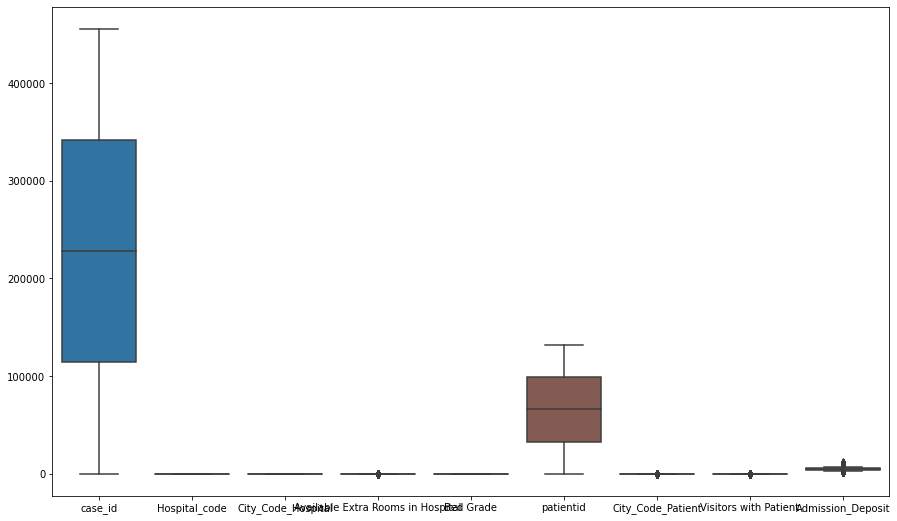

In [371]:
plt.figure(figsize=[15,9])
sns.boxplot(data=df_health)
plt.show()

We can see that there are outliers present in four features. We need to treat them.

In [372]:
cols=['Available Extra Rooms in Hospital','City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']

In [373]:
def boundaries(data,variable):
    LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

In [374]:
for col in cols:
    LL,UL=boundaries(df_health,col)
    
    df_health[col]=np.where(df_health[col]<LL,LL,
                           np.where(df_health[col]>UL,UL,df_health[col]))

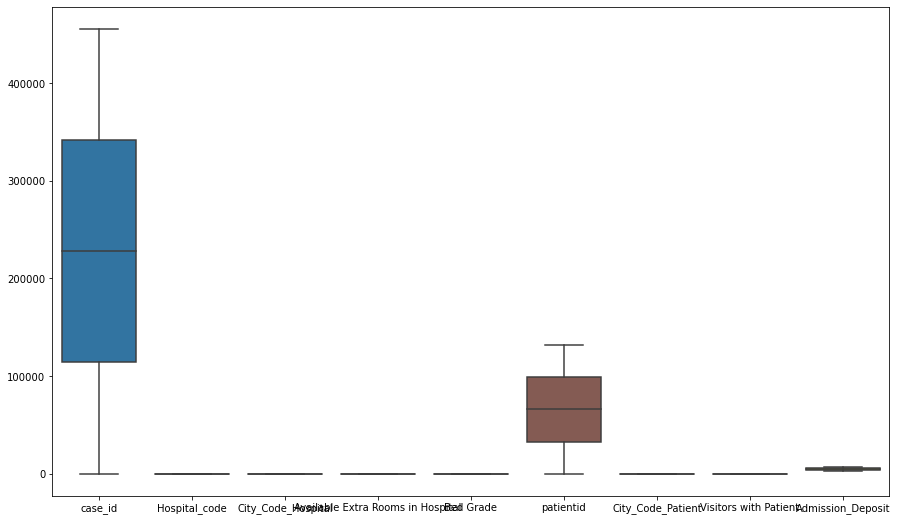

In [375]:
plt.figure(figsize=[15,9])
sns.boxplot(data=df_health)
plt.show()

We can see that the outliers have been treated now.

In [376]:
#Renaming the columns

In [377]:
df_health=df_health.rename(columns={'Bed Grade':'Bed_Grade','Type of Admission':'Type_of_Admission'})

In [378]:
#Checking for Missing Values

In [379]:
df_health.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed_Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type_of_Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
source                                    0
dtype: int64

We can see that we have missing values in Bed_Grade and City_Code_Patient columns. We need to treat them.

In [380]:
#Bed_Grade column

In [381]:
df1=df_health.groupby('Type_of_Admission')['Bed_Grade'].value_counts().to_frame(name='value')
df1=df1.reset_index()
df1.head()

,Type_of_Admission,Bed_Grade,value
0,Emergency,2.0,71750
1,Emergency,3.0,51292
2,Emergency,4.0,24008
3,Emergency,1.0,21247
4,Trauma,3.0,82280


In [382]:
def get_mode(admn):
    vc=df1.loc[df1['Type_of_Admission']==admn].max()
    return vc['Bed_Grade']

In [383]:
df_health.loc[df_health.Bed_Grade.isnull(),'Bed_Grade']=\
df_health.loc[df_health.Bed_Grade.isnull(),'Type_of_Admission'].apply(lambda x:get_mode(x))

In [384]:
df_health.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed_Grade                                 0
patientid                                 0
City_Code_Patient                      6689
Type_of_Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
source                                    0
dtype: int64

In [385]:
#City_Code_patient column

In [386]:
df1=df_health.groupby('City_Code_Hospital')['City_Code_Patient'].median()
df1

City_Code_Hospital
1     8.0
2     8.0
3     8.0
4     7.0
5     7.0
6     7.0
7     8.0
9     8.0
10    8.0
11    2.0
13    8.0
Name: City_Code_Patient, dtype: float64

In [387]:
missing_index=df_health.loc[df_health.City_Code_Patient.isnull(),['City_Code_Patient','City_Code_Hospital']]
missing_index

,City_Code_Patient,City_Code_Hospital
191,NaN,1
192,NaN,3
193,NaN,7
194,NaN,7
195,NaN,1
...,...,...
455259,NaN,9
455269,NaN,6
455349,NaN,11
455381,NaN,6


In [388]:
df_health.loc[missing_index.index,'City_Code_Patient']=\
df_health.loc[missing_index.index,'City_Code_Hospital'].apply(lambda x:df1.loc[x])

In [389]:
df_health.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed_Grade                                 0
patientid                                 0
City_Code_Patient                         0
Type_of_Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
source                                    0
dtype: int64

The missing values are treated now.

In [390]:
#Test for correlation

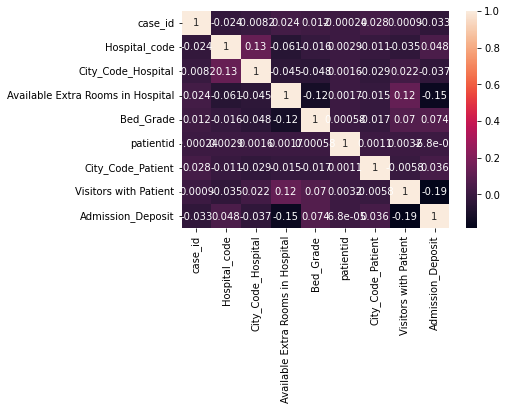

In [391]:
sns.heatmap(df_health.corr(),annot=True)
plt.show()

We can see that there is no strong correlation among the features.

In [392]:
#Separating the train and test set

In [393]:
df_train=df_health.loc[df_health['source']=='train']
df_test=df_health.loc[df_health['source']=='test']

In [394]:
df_train1=df_train.drop(['case_id','source'],axis=1)

In [395]:
df_test1=df_test.drop(['case_id','source','Stay'],axis=1)

In [396]:
df_train1.shape,df_test1.shape

((318438, 17), (137057, 16))

In [397]:
#Dummy Encoding the Categorical features

In [398]:
#for train set

In [343]:
#Label Ecoding the target variable

In [ ]:
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744

In [399]:
le=LabelEncoder()

In [400]:
df_train1['Stay']=le.fit_transform(df_train1['Stay'])

In [401]:
df_train1.Stay.value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

In [402]:
#One Hot Ecoding of other categorical variables

In [403]:
df_train1_dummy=pd.get_dummies(df_train1,drop_first=True)

In [404]:
df_train1_dummy.shape

(318438, 44)

In [405]:
#for test set

In [406]:
df_test1_dummy=pd.get_dummies(df_test1,drop_first=True)

In [407]:
df_test1_dummy.shape

(137057, 43)

In [408]:
#Splitting into X_train and y_train

In [409]:
df_test1_dummy.columns

Index(['Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed_Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'Hospital_type_code_b', 'Hospital_type_code_c', 'Hospital_type_code_d',
       'Hospital_type_code_e', 'Hospital_type_code_f', 'Hospital_type_code_g',
       'Hospital_region_code_Y', 'Hospital_region_code_Z',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Ward_Type_Q',
       'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F',
       'Type_of_Admission_Trauma', 'Type_of_Admission_Urgent',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate',
       'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'],


In [410]:
X_train=df_train1_dummy.drop('Stay',axis=1)

In [411]:
y_train=df_train1_dummy['Stay']

In [412]:
X_test=df_test1_dummy

In [413]:
X_train.shape,y_train.shape,X_test.shape

((318438, 43), (318438,), (137057, 43))

In [414]:
#Scaling the data

In [415]:
sc=StandardScaler()

In [416]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [417]:
#Model Building

1.Logistic Regression

In [418]:
lr=LogisticRegression()

In [419]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [420]:
y_pred_train=lr.predict(X_train_scaled)

In [421]:
y_pred_test=lr.predict(X_test_scaled)

In [422]:
print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.38908672959885443


In [423]:
submit_lr=pd.DataFrame({'case_id':df_test['case_id'],'Stay':y_pred_test})

In [424]:
def segment(x):
    if x==0:
        x='0-10'
    if x==1:
        x='11-20'
    if x==2:
        x='21-30'
    if x==3:
        x='31-40'
    if x==4:
        x='41-50'
    if x==5:
        x='51-60'
    if x==6:
        x='61-70'
    if x==7:
        x='71-80'
    if x==8:
        x='81-90'
    if x==9:
        x='91-100'
    if x==10:
        x='More than 100 Days'
    return x

In [425]:
submit_lr['Stay']=submit_lr['Stay'].apply(segment)

In [427]:
submit_lr.to_csv('healthcare_analytics.submit_lr.csv',index=False)

2.Decision Tree

In [430]:
dt=DecisionTreeClassifier()

In [431]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [433]:
y_pred_train=dt.predict(X_train_scaled)

In [434]:
y_pred_test=dt.predict(X_test_scaled)

In [435]:
print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.9999717370414335


In [437]:
submit_dt=pd.DataFrame({'case_id':df_test['case_id'],'Stay':y_pred_test})

In [438]:
submit_dt['Stay']=submit_dt['Stay'].apply(segment)

In [439]:
submit_dt.to_csv('healthcare_analytics.submit_dt.csv',index=False)

3.Random Forest

In [440]:
rf=RandomForestClassifier()

In [441]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [442]:
y_pred_train=rf.predict(X_train_scaled)

In [443]:
y_pred_test=rf.predict(X_test_scaled)

In [444]:
print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.9999717370414335


In [445]:
submit_rf=pd.DataFrame({'case_id':df_test['case_id'],'Stay':y_pred_test})

In [446]:
submit_rf['Stay']=submit_rf['Stay'].apply(segment)

In [447]:
submit_rf.to_csv('healthcare_analytics.submit_rf.csv',index=False)

4.Naive Bayes

In [449]:
nb=GaussianNB()

In [450]:
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [451]:
y_pred_train=nb.predict(X_train_scaled)

In [452]:
y_pred_test=nb.predict(X_test_scaled)

In [453]:
print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.10250661039197584


In [454]:
submit_nb=pd.DataFrame({'case_id':df_test['case_id'],'Stay':y_pred_test})

In [455]:
submit_nb['Stay']=submit_nb['Stay'].apply(segment)

In [456]:
submit_nb.to_csv('healthcare_analytics.submit_nb.csv',index=False)

In [457]:
#Neural Network

In [470]:
y_train_dummy=np_utils.to_categorical(y_train)

In [471]:
classifier=Sequential()

In [472]:
X_train.shape,y_train_dummy.shape

((318438, 43), (318438, 11))

In [473]:
classifier.add(Dense(128,kernel_initializer='uniform',activation='relu',input_dim=43))
classifier.add(Dense(64,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(11,kernel_initializer='uniform',activation='softmax'))

In [474]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [475]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               5632      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 11)                715       
                                                                 
Total params: 14,603
Trainable params: 14,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(X_train_scaled,y_train_dummy,batch_size=16,epochs=50)

Epoch 1/50
19903/19903 [==============================] - 41s 2ms/step - loss: 1.5711 - accuracy: 0.3977
Epoch 2/50
19903/19903 [==============================] - 50s 3ms/step - loss: 1.5439 - accuracy: 0.4072
Epoch 3/50
19903/19903 [==============================] - 51s 3ms/step - loss: 1.5364 - accuracy: 0.4105
Epoch 4/50
19903/19903 [==============================] - 51s 3ms/step - loss: 1.5313 - accuracy: 0.4129
Epoch 5/50
19903/19903 [==============================] - 50s 3ms/step - loss: 1.5279 - accuracy: 0.4143
Epoch 6/50
19903/19903 [==============================] - 51s 3ms/step - loss: 1.5256 - accuracy: 0.4146
Epoch 7/50
19903/19903 [==============================] - 50s 3ms/step - loss: 1.5227 - accuracy: 0.4157
Epoch 8/50
19903/19903 [==============================] - 52s 3ms/step - loss: 1.5204 - accuracy: 0.4166
Epoch 9/50
19903/19903 [==============================] - 51s 3ms/step - loss: 1.5187 - accuracy: 0.4172
Epoch 10/50
19903/19903 [==============================

In [ ]:
y_pred=classifier.predict(X_test)